# _Template_ de proyecto



**Objetivos:**

* Organizar el código del proyecto en modulos (i.e. archivos `.py`).
* Estructurar el proyecto en secciones.
* Descargar datos del repositorio [UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets), procesarlos, y cargarlos.
* Cargar datos desde un directorio local.


---

In [1]:
import proj_code.dataset as d              # Funciones y rutinas para descargar, procesar los datos, y cargarlos
import proj_code.model as m                # Clase con el modelo a implementar
import proj_code.metric as me              # Metrics utilizadas para el análisis
import matplotlib.pyplot as plt            # Librería para crear visualizaciones
from sklearn.model_selection import train_test_split   # Para separar datos en entrenamiento y evaluación

## 1. Cargar datos

Sección en que se utilizaran las funciones del módulo `dataset.py` para facilitar la gestión y manejo de nuestros datos.

In [2]:
help(d.load_iris_web)

Help on function load_iris_web in module proj_code.dataset:

load_iris_web(URL='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
    Descarga desde el repositorio UCI el dataset iris y retorna un diccionario con el 'dataset', una tupla que
    contiene X (input) e y (output), además de las 'etiquetas'.



Notemos que la función `load_iris_web()` del módulo `dataset.py` tiene un _docstring_ con una breve explicación con su funcionalidad.

<br>

```python
 def load_iris_web(URL=DATA_SOURCE):
    """Descarga desde el repositorio UCI el dataset iris y retorna un diccionario con el 'dataset', una tupla que
    contiene X (input) e y (output), además de las 'etiquetas'."""
```

<br>

A la cual accedimos desde nuestro _jupyter notebook_ con la función `help(nombre_funcion)`. Esto es la mínima práctica de documentación que se espera para las funciones que desarrollen y utilicen en sus proyectos.

Ahora guardamos los datos que nos entrega la función `load_iris_web()`.

In [3]:
data = d.load_iris_web()
X, y = data['dataset']
labels = data['labels']

Datos cargados con éxito


Inspeccionamos las dimensiones del _dataset_ [Iris](https://archive-beta.ics.uci.edu/ml/datasets/iris):

In [4]:
X.shape, y.shape

((150, 4), (150,))

Vemos las primeras 2 observaciones para verificar el formato:

In [5]:
X.head(n=2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
y.head(n=2)

0    0
1    0
Name: species, dtype: int64

¿Cuántas especies distintas hay?

In [7]:
y.unique()

array([0, 1, 2])

Notemos que cuando cargamos el _dataset_ también nos entregaba las etiquetas que nos ayudan a mapear el identificador (i.e. número que vemos arriba) a la clase que representa.

In [8]:
labels

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

Ahora vamos a dejar un 20% del _dataset_ destinado a evaluar que tan bien ajusta nuestro modelo.

Fraccionaremos el conjunto de datos de manera aleatoria, para garantizar la reproducibilidad de los resultados utilizaremos el argumento `random_state` dandole una semilla que permite replicar los resultados.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [11]:
y_train.shape, y_test.shape

((120,), (30,))

Visualizaciones ilustrativas...

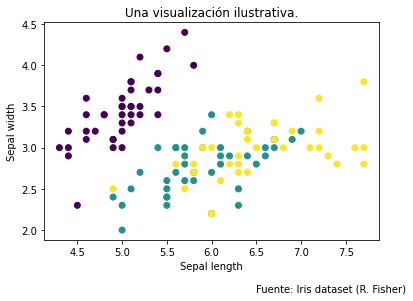

In [33]:
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train);
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');
plt.title('Una visualización ilustrativa.')
plt.text(6.5, 1.25, 'Fuente: Iris dataset (R. Fisher)');

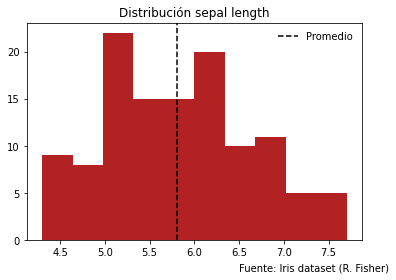

In [54]:
plt.hist(X_train['sepal_length'], color="firebrick");
plt.axvline(X_train['sepal_length'].mean(), linestyle='--', label='Promedio', color='black');
plt.title('Distribución sepal length');
plt.text(6.5, -3.25, 'Fuente: Iris dataset (R. Fisher)');
plt.legend(frameon=False);

## 2. Modelo

Sección en que se utilizaremos los modelos especificados en el módulo `model.py`.


Entrenaremos dos modelos:

* Regresión Logistica
* Naive Bayess 

Los que requieren los datos de entrenamiento que consisten en pares de inputs (`X_train`) y output (`y_train`). Diferentes formas, pero que finalmente usaran los datos para "aprender" y ajustar sus parámetros.

In [40]:
modelo_reg_logistica = m.reg_logistica(X_train, y_train.values.ravel())
modelo_naive_bayes = m.gaussian_naive_bayes(X_train, y_train.values.ravel())

Nuestros modelos ya fueron ajustados y podemos utilizarlos para obtener las predicciones sobre el conjunto que separamos para medir el desempeño. La idea de probar el modelo en datos que no utilizó es medir la generalización en datos nunca antes vistos.

In [41]:
reg_logistica_preds = modelo_reg_logistica.predict(X_test)
naive_bayes_preds = modelo_naive_bayes.predict(X_test)

## 3. Métricas

Sección en que se utilizaran las métricas especificadas en el módulo `metric.py`.

In [45]:
print(f'Desempeño regresión logistica según accuracy: {me.metrica_accuracy(y_test, reg_logistica_preds)}')
print(f'Desempeño naive bayes según accuracy: {me.metrica_accuracy(y_test, naive_bayes_preds)}')

Desempeño regresión logistica según accuracy: 1.0
Desempeño naive bayes según accuracy: 1.0


In [46]:
print(f'Desempeño regresión logistica según f1-score: {me.metrica_f1score(y_test, reg_logistica_preds)}')
print(f'Desempeño naive bayes según f1-score: {me.metrica_f1score(y_test, naive_bayes_preds)}')

Desempeño regresión logistica según f1-score: 1.0
Desempeño naive bayes según f1-score: 1.0


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, reg_logistica_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [49]:
confusion_matrix(y_test, naive_bayes_preds)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])